# An exploration and visualization of some interesting insights about Game of Thrones chracters and relationships. Data is from Kaggle.

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style('whitegrid')
import seaborn as sns
%matplotlib inline

Read in the CSV data

In [200]:
character_deaths = pd.read_csv("GOT_character-deaths.csv")
predictions = pd.read_csv("GOT_character-predictions.csv")

In [201]:
#all titles must be lowercase in order to merge
character_deaths.columns= map(str.lower, character_deaths.columns)

In [202]:
#merge the two csv files
merged = character_deaths.merge(predictions, on='name')
merged.to_csv("output.csv", index=False)

In [203]:
all_characters = pd.read_csv("output.csv")
all_characters.head()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,0,0.130435,1
1,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,...,NaN,NaN,0,0,NaN,0,0,0,0.010033,1
2,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,...,NaN,NaN,0,1,NaN,0,0,0,0.030100,1
3,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,...,NaN,1.0,1,1,60.0,0,0,0,0.147157,0
4,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1


Initially there were 850 characters in the dataset but clearly less important ones should be weeded out since the are not interesting to the story

In [204]:
all_characters.shape[0]

850

Now we select the characters that are popular and pull them out of the DataFrame and create a new DataFrame called ic with only 72 popular characters

In [205]:
ic = all_characters.loc[all_characters['isPopular'] == 1].copy()
ic.head()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
4,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1
37,Arianne Martell,House Martell,NaN,NaN,NaN,2.0,0,1,0,0,...,NaN,NaN,0,1,29.0,0,0,1,0.571906,1
47,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,...,NaN,NaN,0,1,16.0,8,1,1,1.000000,1
48,Arys Oakheart,Lannister,300.0,4.0,21.0,57.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,1,0.344482,0
49,Asha Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,...,NaN,1.0,1,1,30.0,0,0,1,0.709030,1


In [206]:
ic = ic.reset_index(drop=True)
ic.head()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,NaN,NaN,0,1,36.0,4,1,1,0.458194,1
1,Arianne Martell,House Martell,NaN,NaN,NaN,2.0,0,1,0,0,...,NaN,NaN,0,1,29.0,0,0,1,0.571906,1
2,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,...,NaN,NaN,0,1,16.0,8,1,1,1.000000,1
3,Arys Oakheart,Lannister,300.0,4.0,21.0,57.0,1,1,1,1,...,NaN,NaN,0,1,NaN,0,0,1,0.344482,0
4,Asha Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,...,NaN,1.0,1,1,30.0,0,0,1,0.709030,1


In [207]:
# in order to view missing data
ic.isnull()

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,False,False,True,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,False,False,True,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
6,False,False,True,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
9,False,False,True,True,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


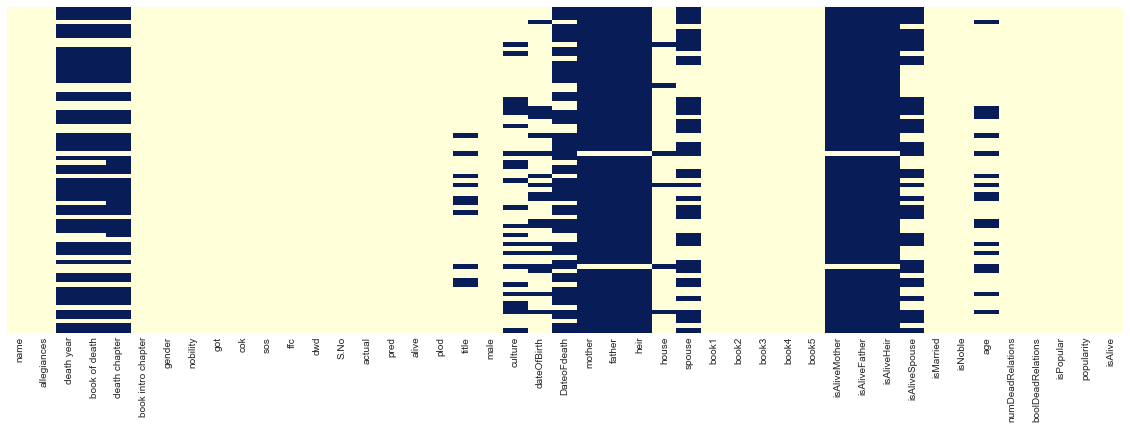

In [208]:
ax = plt.figure(figsize = (20,6))
sns.heatmap(ic.isnull(),yticklabels=False,cbar=False, cmap="YlGnBu", linecolor = 'black')

In [209]:
# #Those with deep blue aka missing information should be dropped; mother, father, 
# #heir, spouse, isAliveMother, isAliveFather, isAliveHeir, isAliveSpouse
# ic.drop('mother',axis=1,inplace=True)
# ic.drop('father',axis=1,inplace=True)
# ic.drop('heir',axis=1,inplace=True)
# #ic.drop('spouse',axis=1,inplace=True)
# ic.drop('isAliveMother',axis=1,inplace=True)
# ic.drop('isAliveFather',axis=1,inplace=True)
# ic.drop('isAliveHeir',axis=1,inplace=True)
# ic.drop('isPopular',axis=1,inplace=True)
# #ic.drop('isAliveSpouse',axis=1,inplace=True)

In [210]:
ic.drop('isPopular',axis=1,inplace=True)

# Correlation Heat Map

In [211]:
ic.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,sos,ffc,dwd,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,popularity,isAlive
death year,1.0,0.85,-0.0027,0.56,nan,-0.02,-0.24,0.35,0.65,0.41,0.36,-0.16,-0.44,-0.2,0.25,-0.25,0.44,-0.19,-0.53,-0.02,-0.02,-0.02,0.25,-0.02,1.0,1.0,nan,-0.4,-0.1,0.1,0.18,-0.55,-0.37,0.094,-0.44
book of death,0.85,1.0,-0.25,0.49,nan,-0.096,-0.21,0.4,0.61,0.53,0.67,-0.11,-0.34,-0.14,0.23,-0.23,0.34,-0.22,-0.38,0.021,0.021,0.021,0.22,0.021,nan,nan,nan,-0.16,-0.27,0.19,0.22,-0.58,-0.49,-0.044,-0.34
death chapter,-0.0027,-0.25,1.0,-0.27,nan,-0.23,-0.35,-0.13,-0.1,-0.39,-0.17,-0.038,-0.28,0.038,0.045,-0.045,-0.17,-0.26,0.18,-0.11,-0.11,-0.11,-0.2,-0.11,1.0,1.0,nan,-0.61,0.28,-0.18,0.23,0.27,0.4,0.35,-0.28
book intro chapter,0.56,0.49,-0.27,1.0,0.34,-0.14,-0.0076,0.18,0.26,0.25,-0.11,-0.076,-0.16,0.13,0.088,-0.088,0.36,-0.24,-0.29,0.071,0.17,0.1,0.18,0.11,1.0,1.0,nan,0.051,0.0091,0.089,0.22,-0.37,-0.27,-0.18,-0.16
gender,nan,nan,nan,0.34,1.0,-0.051,0.19,0.047,-0.039,-0.21,-0.17,0.13,-0.31,-0.2,-0.21,0.21,0.96,-0.33,nan,0.061,0.064,0.014,-0.11,0.014,nan,nan,nan,0.27,-0.18,0.1,0.33,-0.16,-0.0041,-0.058,-0.31
nobility,-0.02,-0.096,-0.23,-0.14,-0.051,1.0,0.021,-0.21,-0.072,-0.11,0.0098,-0.14,-0.043,-0.15,-0.13,0.13,-0.062,0.052,0.076,0.18,-0.12,-0.097,-0.086,0.077,nan,nan,nan,0.37,0.22,0.096,-0.081,0.2,0.26,0.077,-0.043
got,-0.24,-0.21,-0.35,-0.0076,0.19,0.021,1.0,0.23,0.26,-0.19,-0.24,-0.0013,-0.29,-0.057,-0.17,0.17,0.16,0.083,0.096,0.49,0.3,0.15,-0.05,0.03,nan,nan,nan,0.11,-0.073,-0.066,-0.054,0.35,0.32,0.27,-0.29
cok,0.35,0.4,-0.13,0.18,0.047,-0.21,0.23,1.0,0.29,0.25,0.048,0.017,0.15,0.23,0.15,-0.15,0.1,0.2,-0.28,0.21,0.39,0.084,0.13,0.084,nan,nan,nan,-0.13,-0.052,0.18,-0.11,0.083,0.1,0.28,0.15
sos,0.65,0.61,-0.1,0.26,-0.039,-0.072,0.26,0.29,1.0,0.11,-0.0089,-0.23,0.086,0.16,0.1,-0.1,0.01,-0.056,-0.25,0.037,0.021,0.03,-0.05,-0.2,nan,nan,nan,-0.1,0.16,-0.066,0.13,0.035,0.017,0.33,0.086
ffc,0.41,0.53,-0.39,0.25,-0.21,-0.11,-0.19,0.25,0.11,1.0,-0.026,-0.023,0.33,0.063,0.14,-0.14,-0.17,0.21,-0.13,0.082,0.069,0.15,0.23,0.04,nan,nan,nan,-0.016,0.02,0.17,-0.15,-0.0065,0.013,-0.13,0.33


Text(0.5,1,'Character Correlation')

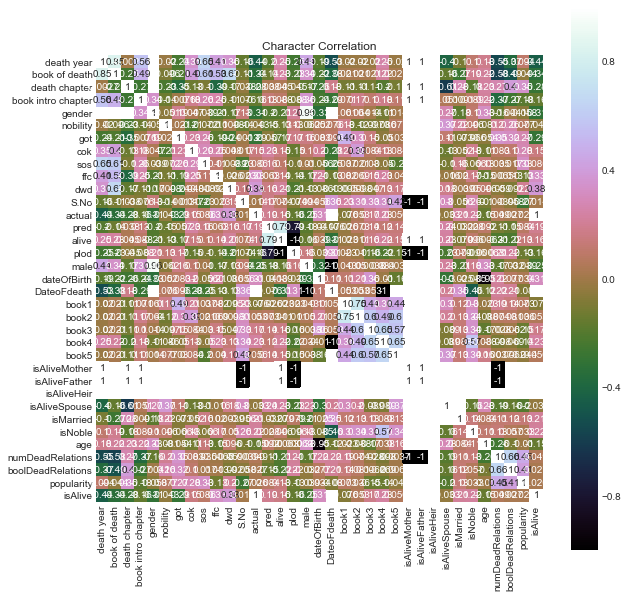

In [212]:
correlation = ic.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Character Correlation')

# Looking At Different Correlation

In [213]:
ic['isAlive'].corr(ic['popularity'])

0.02639249505677034

# Get_Dummies Cleaning

In [235]:
ic['allegiances'].unique()

array(['House Greyjoy', 'House Martell', 'Stark', 'Lannister', 'Targaryen',
       "Night's Watch", 'None', 'House Stark', 'House Targaryen',
       'House Tully', 'House Lannister', 'Baratheon', 'Martell', 'Tyrell',
       'House Tyrell', 'Wildling', 'House Baratheon'], dtype=object)

In [236]:
ic['culture'] = ic['culture'].fillna('None

SyntaxError: EOL while scanning string literal (<ipython-input-236-cb2ef48b5db8>, line 1)

In [237]:
ic['culture'].unique()

array(['Ironmen', 'Dornishmen', 'Northmen', 'Reach', 'Ironborn',
       'Valyrian', 'Westeros', nan, 'Rivermen', 'Westerlands', 'Dornish',
       'Dothraki', 'Pentoshi', 'Westermen', 'Stormlands', 'The Reach',
       'Free folk', 'Asshai', 'Riverlands', 'Reachmen', 'Valemen'], dtype=object)

In [238]:
d = {
    'Ironmen':'Ironborn', 
    'Ironborn':'Ironborn', 
    'Dornish':'Dornishmen',
    'Dornishmen': 'Dornishmen',
    'Westermen':'Westerlands', 
    'Westerlands':'Westerlands',
    'Reach':'Reach',
    'Reachmen': 'Reach',
    'The Reach': 'Reach',
    'The Reach':'Reach',
    'Riverlands':'Riverlands',
    'Riverlands':'Rivermen',
    'Rivermen':'Rivermen',
    'Northmen':'Northmen',
    'Valyrian':'Valyrian',
    'Westeros':'Westerosi',
    'Dothraki':'Dothraki',
    'Pentoshi':'Pentoshi',
    'Stormlands':'Stormlander',
    'Free Folk':'Free Folk',
    'Asshai':'Asshai',
    'Valemen':'Valemen',
    'None': 'None'
}

new_df = ic.copy()

new_df['culture'] = new_df['culture'].map(d, na_action=None)
new_df['culture']

0        Ironborn
1      Dornishmen
2        Northmen
3           Reach
4        Ironborn
5        Valyrian
6       Westerosi
7        Northmen
8             NaN
9        Northmen
10            NaN
11       Valyrian
12       Rivermen
13    Westerlands
14       Valyrian
15      Westerosi
16     Dornishmen
17       Dothraki
18       Northmen
19       Rivermen
20            NaN
21            NaN
22            NaN
23            NaN
24       Pentoshi
25    Westerlands
26            NaN
27       Northmen
28       Northmen
29    Westerlands
         ...     
42         Asshai
43       Rivermen
44            NaN
45     Dornishmen
46     Dornishmen
47          Reach
48            NaN
49        Valemen
50            NaN
51     Dornishmen
52            NaN
53       Northmen
54            NaN
55    Stormlander
56       Northmen
57            NaN
58       Northmen
59       Northmen
60      Westerosi
61            NaN
62       Northmen
63            NaN
64       Ironborn
65            NaN
66        

In [239]:
new_df['allegiances'].unique()

array(['House Greyjoy', 'House Martell', 'Stark', 'Lannister', 'Targaryen',
       "Night's Watch", 'None', 'House Stark', 'House Targaryen',
       'House Tully', 'House Lannister', 'Baratheon', 'Martell', 'Tyrell',
       'House Tyrell', 'Wildling', 'House Baratheon'], dtype=object)

In [240]:
d = {
    'House Greyjoy':'House Greyjoy',
    'House Martell': 'House Martell',
    'Stark': 'Stark',
    'House Stark': "Stark",
    'Lannister':'Lannister',
    'Targaryen':'Targaryen',
    'House Targaryen':"Targaryen",
    "Night's Watch":"Night's Watch",
    'None':'None',
    'House Tully':'House Tully',
    'House Lannister':'Lannister',
    'Baratheon': 'Baratheon',
    'Martell':'Martell',
    'Tyrell':'Tyrell',
    'House Tyrell':"Tyrell",
    'Wildling':'Wildling',
    'House Baratheon':"Baratheon"
    

}

new_new_df = ic.copy()

new_new_df['allegiances'] = new_new_df['allegiances'].map(d, na_action=None)
new_new_df["allegiances"]

0     House Greyjoy
1     House Martell
2             Stark
3         Lannister
4     House Greyjoy
5         Lannister
6         Targaryen
7     Night's Watch
8              None
9             Stark
10        Lannister
11        Targaryen
12      House Tully
13        Lannister
14        Targaryen
15        Baratheon
16          Martell
17        Targaryen
18            Stark
19      House Tully
20             None
21        Lannister
22        Lannister
23        Lannister
24        Targaryen
25        Lannister
26             None
27    Night's Watch
28            Stark
29            Stark
          ...      
42        Baratheon
43             None
44        Lannister
45    House Martell
46    House Martell
47        Lannister
48           Tyrell
49             None
50        Lannister
51          Martell
52        Lannister
53             None
54           Tyrell
55        Baratheon
56            Stark
57            Stark
58            Stark
59            Stark
60    Night's Watch


get dummies code for culture and allegiance but first have to create something to make the same

In [241]:
dummy = pd.get_dummies(new_new_df, columns=['culture'])
dummy

,name,allegiances,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,...,culture_Reachmen,culture_Riverlands,culture_Rivermen,culture_Stormlands,culture_The Reach,culture_Valemen,culture_Valyrian,culture_Westerlands,culture_Westermen,culture_Westeros
0,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Arianne Martell,House Martell,NaN,NaN,NaN,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arya Stark,Stark,NaN,NaN,NaN,2.0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Arys Oakheart,Lannister,300.0,4.0,21.0,57.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,Asha Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Aurane Waters,Lannister,NaN,NaN,NaN,65.0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,Barristan Selmy,Targaryen,NaN,NaN,NaN,15.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
7,Benjen Stark,Night's Watch,298.0,1.0,24.0,5.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,Beric Dondarrion,None,300.0,4.0,27.0,42.0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,Bran Stark,Stark,NaN,NaN,NaN,1.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [242]:
df = pd.get_dummies(dummy, columns=["allegiances"])
df.head()

,name,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,sos,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
0,Aeron Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Arianne Martell,NaN,NaN,NaN,2.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Arya Stark,NaN,NaN,NaN,2.0,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,Arys Oakheart,300.0,4.0,21.0,57.0,1,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Asha Greyjoy,NaN,NaN,NaN,11.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [243]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


Seperating Characters that are dead (wierd ones like Benjen Stark)

In [ ]:
#create new dataframe for deceased characters
df['book of death'] = df['book of death'].fillna('none')
dead_characters = df[df['book of death'] != 'none'].copy()
dead_characters.head(20)

In [ ]:
dead_characters.shape[0]

In [ ]:
#create new dataframe for alive characters
df['book of death'] = df['book of death'].fillna('none')
alive_characters = df[df['book of death'] == 'none'].copy()
alive_characters.head()

In [216]:
alive_characters.shape[0]

50

In [217]:
#what is happening??

all_characters_allegiance = df.groupby('allegiances').count()
all_characters_allegiance[['name']]

KeyError: 'allegiances'

# Allegiances By The Numbers

In [218]:
# Create a group based on the values in the 'maker' column
maker_group = all_characters_allegiance.groupby('allegiances')

# Count how many times each maker appears in our group
count_makers = maker_group['name'].sum()

# Create a bar chart based off of the group series from before
count_chart = count_makers.plot(kind='pie', figsize=(9,9))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Houses")

plt.show()

NameError: name 'all_characters_allegiance' is not defined

In [219]:
deaths_by_allegiances['death_proportion'] = deaths_by_allegiances['name'] / all_characters_allegiance['name']
deaths_by_allegiances['death_proportion']

NameError: name 'deaths_by_allegiances' is not defined

In [220]:
# Create a group based on the values in the 'maker' column
maker_group = deaths_by_allegiances.groupby('allegiances')

# Count how many times each maker appears in our group
count_makers = maker_group['name'].sum()

# Create a bar chart based off of the group series from before
count_chart = count_makers.plot(kind='pie', figsize=(9,9))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Houses")

plt.show()

NameError: name 'deaths_by_allegiances' is not defined

In [221]:
#exploring charachters by Allegiance
deaths_by_allegiances = dead_characters.groupby('allegiances').count()
deaths_by_allegiances[['name']]

KeyError: 'allegiances'

In [222]:
deaths_by_allegiances['death_proportion'] = deaths_by_allegiances['name'] / all_characters_allegiance['name']
deaths_by_allegiances['death_proportion']

NameError: name 'deaths_by_allegiances' is not defined

In [223]:
x_axis = np.arange(len(deaths_by_allegiances))
tick_locations = [value+0.4 for value in x_axis]

NameError: name 'deaths_by_allegiances' is not defined

In [224]:
plt.figure(figsize=(40,20))
plt.bar(x_axis, deaths_by_allegiances['death_proportion'], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, deaths_by_allegiances.index, rotation="vertical")

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }

plt.title("Death By Allegiances")
plt.xlabel("Allegiance",fontdict=font)
plt.ylabel("Death",fontdict=font)

plt.show()

NameError: name 'x_axis' is not defined

Text(0.5,1,'Most popular characters in GOT and number of death associated with them(box and slide bar representing them)')

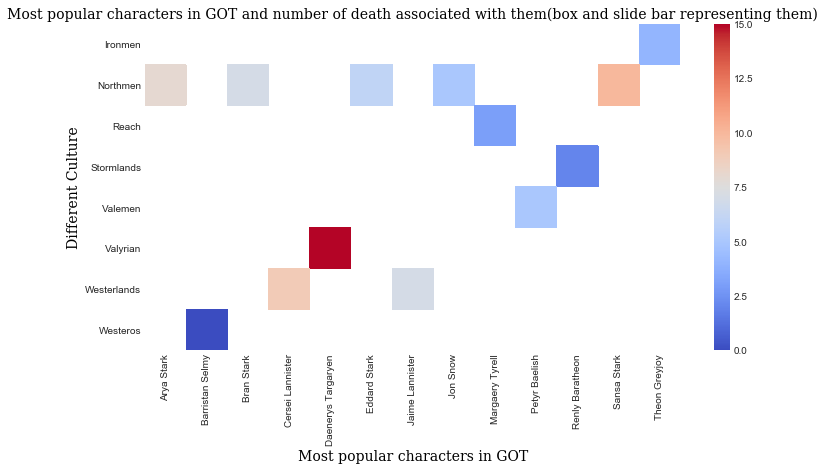

In [225]:
Pop = all_characters[all_characters['popularity'] == 1]
pivot = Pop.pivot_table(values = 'numDeadRelations', index = 'culture',columns='name')
ax = plt.figure(figsize = (12,6))
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
sns.heatmap(pivot, cmap= 'coolwarm')
plt.xlabel('Most popular characters in GOT',fontdict=font)
plt.ylabel('Different Culture',fontdict=font)
plt.title('Most popular characters in GOT and number of death associated with them(box and slide bar representing them)',fontdict
         =font)

In [226]:
#alive and deceased family relationship
rel_data = all_characters.groupby(["boolDeadRelations", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
rel_data

isAlive,0,1
boolDeadRelations,,
0,233,545
1,25,47


In [227]:
#alive and deceased family relationship
rel_data = all_characters.groupby(["boolDeadRelations", "isAlive"]).count()
rel_data

name  allegiances  death year  book of death  \
boolDeadRelations isAlive                                                 
0                 0         233          233         231            232   
                  1         545          545          17             18   
1                 0          25           25          24             24   
                  1          47           47           1              1   

                           death chapter  book intro chapter  gender  \
boolDeadRelations isAlive                                              
0                 0                  226                 229     233   
                  1                   18                 538     545   
1                 0                   23                  25      25   
                  1                    1                  47      47   

                           nobility  got  cok     ...      isAliveMother  \
boolDeadRelations isAlive                         ...                      
0                 0             233  233  233     ...                  0   
                  1             545  545  545     ...                  0   
1                 0              25   25   25     ...                  2   
                  1              47   47   47     ...                  0   

                           isAliveFather  isAliveHeir  isAliveSpouse  \
boolDeadRelations isAlive                                              
0                 0                    0            0             15   
                  1                    0            0             47   
1                 0                    2            2              7   
                  1                    0            0             21   

                           isMarried  isNoble  age  numDeadRelations  \
boolDeadRelations isAlive                                              
0                 0              233      233   46               233   
                  1              545      545  111               545   
1                 0               25       25   17                25   
                  1               47       47   39                47   

                           isPopular  popularity  
boolDeadRelations isAlive                         
0                 0              233         233  
                  1              545         545  
1                 0               25          25  
                  1               47          47  

[4 rows x 43 columns]

In [228]:
#alive and deceased family relationship
rel_data = dead_characters.groupby(["boolDeadRelations"]).count()
rel_data

,name,death year,book of death,death chapter,book intro chapter,gender,nobility,got,cok,sos,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
boolDeadRelations,,,,,,,,,,,,,,,,,,,,,
0,9,9,9,7,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1,13,13,13,12,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


In [229]:
#alive and deceased family relationship
rel_data = all_characters.groupby(["nobility", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
rel_data

isAlive,0,1
nobility,,
0,156,292
1,102,300


In [230]:
rel_data = alive_characters.groupby(["nobility"]).count()
rel_data

,name,death year,book of death,death chapter,book intro chapter,gender,got,cok,sos,ffc,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
nobility,,,,,,,,,,,,,,,,,,,,,
0,6,0,6,0,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,44,0,44,0,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


In [231]:
rel_data = dead_characters.groupby(["nobility"]).count()
rel_data

,name,death year,book of death,death chapter,book intro chapter,gender,got,cok,sos,ffc,...,allegiances_House Martell,allegiances_House Tully,allegiances_Lannister,allegiances_Martell,allegiances_Night's Watch,allegiances_None,allegiances_Stark,allegiances_Targaryen,allegiances_Tyrell,allegiances_Wildling
nobility,,,,,,,,,,,,,,,,,,,,,
0,2,2,2,1,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,20,20,20,18,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [244]:
#problem!!!!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 74 columns):
name                         72 non-null object
death year                   22 non-null float64
book of death                22 non-null float64
death chapter                19 non-null float64
book intro chapter           72 non-null float64
gender                       72 non-null int64
nobility                     72 non-null int64
got                          72 non-null int64
cok                          72 non-null int64
sos                          72 non-null int64
ffc                          72 non-null int64
dwd                          72 non-null int64
S.No                         72 non-null int64
actual                       72 non-null int64
pred                         72 non-null int64
alive                        72 non-null float64
plod                         72 non-null float64
title                        62 non-null object
male                         72 non-n

# Attempt to do Linear Regression (since using primarily binary data this type does not work well


In [245]:
test = df.copy()

In [248]:
test['age'] = test['age'].fillna(test['age'].mean())

In [250]:
test[['age', 'popularity']]

,age,popularity
0,36.000000,0.458194
1,29.000000,0.571906
2,16.000000,1.000000
3,37.166667,0.344482
4,30.000000,0.709030
5,28.000000,0.377926
6,69.000000,1.000000
7,38.000000,0.401338
8,23.000000,0.434783
9,15.000000,1.000000


In [251]:
X = test.popularity.values.reshape(-1, 1)
y = test.age.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (72, 1) (72, 1)


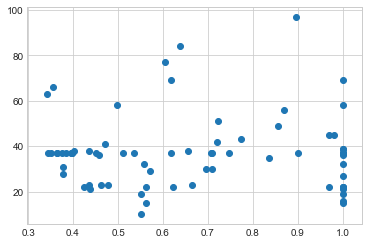

In [252]:
plt.scatter(X, y)

In [253]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [254]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [255]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.56470919]]
y-axis intercept:  [ 37.5483595]


In [256]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[ 0.34113712]]
Max X Value: [[ 1.]]


In [257]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

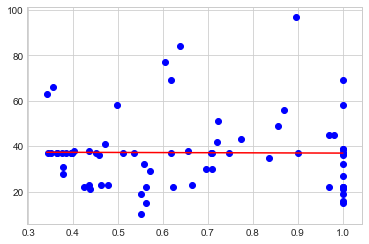

In [258]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

# Attempt Part II


In [260]:
X = df[["nobility", "popularity"]]
y = df["isAlive"].values.reshape(-1, 1)

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=26)

In [262]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [263]:
predictions=model.predict(X_test)

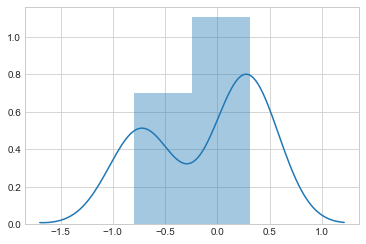

In [264]:
import seaborn as sb
sb.distplot(y_test-predictions)

In [265]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.07978727 -0.07269107]]
y-axis intercept:  [ 0.84317704]


In [266]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1]
Predicted output: [ 0.73008316]
Prediction Error: [-0.26991684]


Text(0.5,1,'Residual Plot')

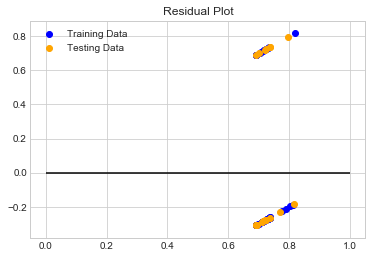

In [267]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

# Quantify

MSE and R2 Score

A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

In [268]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X)
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.21345916397734363
R-squared (R2 ): -0.005974823689590236


In [270]:
# Overall Score for the model
model.score(X, y)

-0.0059748236895902362

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [272]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [273]:
model.score(X_test, y_test)

-0.19616544639627098

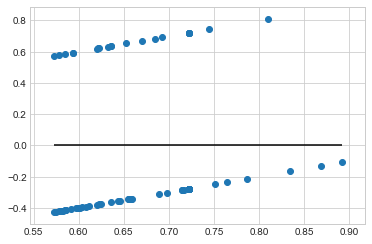

In [274]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

# Attempt at Scaling and Normalizing the Data

In [275]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [276]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [277]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

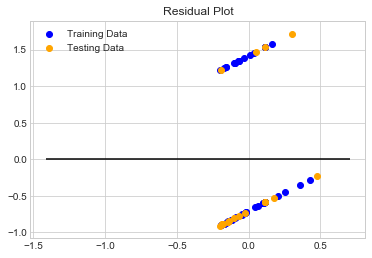

In [278]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [279]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9303509027526555, R2: -0.19616544639627143


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 74 columns):
name                         72 non-null object
death year                   22 non-null float64
book of death                22 non-null float64
death chapter                19 non-null float64
book intro chapter           72 non-null float64
gender                       72 non-null int64
nobility                     72 non-null int64
got                          72 non-null int64
cok                          72 non-null int64
sos                          72 non-null int64
ffc                          72 non-null int64
dwd                          72 non-null int64
S.No                         72 non-null int64
actual                       72 non-null int64
pred                         72 non-null int64
alive                        72 non-null float64
plod                         72 non-null float64
title                        62 non-null object
male                         72 non-n

# Attempt to do Logistical Regression USE THIS


In [377]:
new = df[["isAlive", "allegiances_Stark", "culture_Northmen", "age", "allegiances_Wildling", "popularity" ]]
new.head()

,isAlive,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,1,0,0,36.0,0,0.458194
1,1,0,0,29.0,0,0.571906
2,1,1,1,16.0,0,1.000000
3,0,0,0,NaN,0,0.344482
4,1,0,0,30.0,0,0.709030


In [378]:
new['age'] = new['age'].fillna(new['age'].mean())

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [379]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [380]:
# Assign X (data) and y (target)
X = new.drop("isAlive", axis=1)
y = new["isAlive"]
print(X.shape, y.shape)

(72, 5) (72,)


In [381]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [366]:
indexes=X_test.index
list(indexes)
newww= df.iloc[list(indexes)]["name"]
newww.head()

43     Merrett Frey
27     Jeor Mormont
60    Samwell Tarly
9        Bran Stark
12    Brynden Tully
Name: name, dtype: object

In [367]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [368]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [369]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6851851851851852
Testing Data Score: 0.7222222222222222


In [370]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

v = (predictions - y_test)**2

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [0, 0, 1, 1, 1, 1, 1, 1, 0, 1]


In [371]:
sum(v)/ len(v)

0.27777777777777779

In [372]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,0,1,Merrett Frey
1,0,1,Jeor Mormont
2,1,1,Samwell Tarly
3,1,1,Bran Stark
4,1,1,Brynden Tully
5,1,1,Mathis Rowan
6,1,1,Edmure Tully
7,1,1,Margaery Tyrell
8,0,1,Luwin
9,1,1,Jon Snow


In [373]:
final_sw = pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(72)
final_sw.head()

,Actual,Prediction,name
0,0,1,Merrett Frey
1,0,1,Jeor Mormont
2,1,1,Samwell Tarly
3,1,1,Bran Stark
4,1,1,Brynden Tully


In [374]:
final_sw[(final_sw['Prediction'] == 1) & (final_sw['Actual'] == 0)]

,Actual,Prediction,name
0,0,1,Merrett Frey
1,0,1,Jeor Mormont
8,0,1,Luwin
12,0,1,Joffrey Baratheon
17,0,1,Viserys Targaryen


In [382]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.5

In [383]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.46113935867361833, 'age'),
 (0.44671483587338678, 'popularity'),
 (0.055007549223429007, 'allegiances_Stark'),
 (0.032367422695218431, 'culture_Northmen'),
 (0.0047708335343476594, 'allegiances_Wildling')]

# Attempt at Decision Trees

In [358]:
from sklearn import tree
import pandas as pd
import os

In [359]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [360]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,0,0,36.000000,0,0.458194
1,0,0,29.000000,0,0.571906
2,1,1,16.000000,0,1.000000
3,0,0,37.166667,0,0.344482
4,0,0,30.000000,0,0.709030


In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [130]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.62441314553990612

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6619718309859155

In [132]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.95650005069770427, 'popularity'), (0.043499949302295844, 'gender')]

# KMeans Attempt

In [391]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import os

In [392]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [393]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,0,0,36.000000,0,0.458194
1,0,0,29.000000,0,0.571906
2,1,1,16.000000,0,1.000000
3,0,0,37.166667,0,0.344482
4,0,0,30.000000,0,0.709030


In [394]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [396]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KMeans(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'n_neighbors'

# Support Vector Machine USE THIS ONE


In [399]:
new = df[["isAlive", "allegiances_Stark", "culture_Northmen", "age", "allegiances_Wildling", "popularity" ]]
new['age'] = new['age'].fillna(new['age'].mean())
new.head()

/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,isAlive,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,1,0,0,36.000000,0,0.458194
1,1,0,0,29.000000,0,0.571906
2,1,1,1,16.000000,0,1.000000
3,0,0,0,37.166667,0,0.344482
4,1,0,0,30.000000,0,0.709030


In [400]:
target = new["isAlive"]
target_names = ["dead", "alive"]

In [401]:
data = new.drop("isAlive", axis=1)
feature_names = data.columns
data.head()

,allegiances_Stark,culture_Northmen,age,allegiances_Wildling,popularity
0,0,0,36.000000,0,0.458194
1,0,0,29.000000,0,0.571906
2,1,1,16.000000,0,1.000000
3,0,0,37.166667,0,0.344482
4,0,0,30.000000,0,0.709030


In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [403]:
indexes=X_test.index
list(indexes)

newww= all_characters.iloc[list(indexes)]["name"]
newww.head()

4        Aeron Greyjoy
62         Bearded Ben
18                Alyn
0       Addam Marbrand
28    Andrew Estermont
Name: name, dtype: object

In [404]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [405]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.778


In [406]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

             precision    recall  f1-score   support

       dead       0.00      0.00      0.00         4
      alive       0.78      1.00      0.88        14

avg / total       0.60      0.78      0.68        18



/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [410]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 0, 1, 1, 0, 1, 0, 1, 1]


In [411]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(20)

,Actual,Prediction,name
0,1,1,Aeron Greyjoy
1,1,1,Bearded Ben
2,0,1,Alyn
3,1,1,Addam Marbrand
4,1,1,Andrew Estermont
5,0,1,Aurane Waters
6,1,1,Albett
7,0,1,Archibald Yronwood
8,1,1,Alerie Hightower
9,1,1,Balon Swann


In [412]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.66666666666666663

In [413]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.47141759584488019, 'popularity'),
 (0.43760503458392608, 'age'),
 (0.052265879604252274, 'allegiances_Stark'),
 (0.033539423829853462, 'culture_Northmen'),
 (0.0051720661370881979, 'allegiances_Wildling')]

# Apply Gridsearch 

In [214]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [215]:
indexes=X_test.index
list(indexes)

newww= all_characters.iloc[list(indexes)]["name"]
newww.head()

512              Mohor
357       Janna Tyrell
110           Caleotte
684      Samwell Tarly
39     Arnolf Karstark
Name: name, dtype: object

In [216]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [217]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [218]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6995305164319249, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6995305164319249, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.6981132075471698, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=5, gamma=0.001, score=0.6981132075471698, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.6981132075471698, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.6995305164319249, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.6981132075471698, total=   0.0s
[CV] C=5, gamma=0.005 ................................................
[CV] ....... C=5, gamma=0.005, score=0.6981132075471698, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.6995305164319249, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.6981132075471698, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [219]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [220]:
print(grid.best_score_)

0.698587127159


In [221]:
predictions = grid.predict(X_test)

In [222]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["alive", "dead"]))

             precision    recall  f1-score   support

      alive       0.00      0.00      0.00        66
       dead       0.69      1.00      0.82       147

avg / total       0.48      0.69      0.56       213



/Users/blakezpalder/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [223]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test, "name": newww}).reset_index(drop=True).head(30)

,Actual,Prediction,name
0,0,1,Mohor
1,1,1,Janna Tyrell
2,1,1,Caleotte
3,1,1,Samwell Tarly
4,1,1,Arnolf Karstark
5,1,1,Bellonara Otherys
6,1,1,Tormund
7,1,1,Ghost of High Heart
8,0,1,Varamyr
9,0,1,Mandon Moore
